In [8]:
from skimage import io, exposure, measure
import pandas as pd
import numpy as np 
import os 
import glob 
import matplotlib.pyplot as plt
import re
import cv2
from pathlib import Path

In [13]:
# Get CSV for each timepoint/well
def main(well_csv_list, re_time, re_well,re_field, BF_path, output):
    for csv in well_csv_list:
        print(f'--current csv: {csv}--')

        # BF_file and Obj csv file located in different dir; use csv to match each obj to correct BF_image 
        df = pd.read_csv(csv); BF_files = df.iloc[:, df.columns.get_loc('FileName_BF')]

        # For each csv (timepoint/well) split csv into different FOV (1-9)
        # Reset field number for each csv file i.e. well
        for f, field in enumerate(pd.unique(BF_files)): 
            
            # Locate correct BF_image using metadata extracted from csv file
            time = re_time.findall(str(field))[0]; well = re_well.findall(str(field))[0]; field_re=re_field.findall(str(field))[0]
            BF_file = f'{BF_path}/{time}/{well}/Brightfield/{field}'

            # Split df on FOV; get centre coordinates for each obj
            df_field = df[df['FileName_BF'].isin([field])]
            
            print(field)
            
            # Get Image masks for every FOV in Well
            field_f = field_re.replace('_', '') 
            
            print(len(df_field))
            # Centre crop all objects & Save to new CentreCrops/Timepoint/Well/*
            output_dir = os.path.join(output, time, well)

            for obj in range(0,len(df_field)):
                print(obj)
                
                img_list=glob.glob(f'/hpc/scratch/hdd2/fs541623/CellProfilerFeatureExtraction/CP_Cropped_Cells/{time}/{well}/{field_f}/*.tiff')
                img_masks = io.imread(img_list[0])
                
                print('----------innner for loop -----------------------')
                obj_filename = f'{time}_{well}_Field_{f+1}_obj{obj}.tif'
                cropped_img = get_centre_crop(df_field, BF_file, obj, img_masks)
                save_crop(obj_filename, cropped_img, output_dir)
        
            # Update field number 
            print(f'outer -----------Object: {obj} for field: {field} {f+1}successfully cropped-----------')
                
    return 0

In [3]:
# Centre Crop Cells
def crop_img_test(df, img, obj_number):

    # Get Coordinates
    centre_X = int(df.iloc[obj_number, df.columns.get_loc('Location_Center_X')])
    centre_Y = int(df.iloc[obj_number, df.columns.get_loc('Location_Center_Y')])
    
    # Crop using centre
    y2, y1, x2, x1 = int(centre_Y+100), int(centre_Y-100),  int(centre_X+100), int(centre_X-100)
    cropped = img[y1:y2, x1:x2]
    
    return cropped

In [74]:
# Save Image to timepoint/well dir
def save_crop(file, img, output_dir):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    grayscale_stack = np.dstack([img, img, img])
    io.imsave(os.path.join(output_dir, file), grayscale_stack)
    print('saving image')
    
    return 0

In [145]:
BF_file = '/hpc/scratch/hdd2/fs541623/Pre_processed_Images/Time_16hrs_R1/Well_08/Brightfield/Time_16hrs_R1_Well_08_Field_1_C1.tif'

In [147]:
df = pd.read_csv('/hpc/scratch/hdd2/fs541623/CellProfilerFeatureExtraction/CP_Data/Time_16hrs_R1/Well_08/FilteredCytObj.csv')

In [398]:
filepath = '/hpc/scratch/hdd2/fs541623/CellProfilerFeatureExtraction/CP_Cropped_Cells/Time_16hrs_R1/Well_08/Field1/FilteredCytObj_2.tiff'

In [12]:
masks_f = glob.glob('/hpc/scratch/hdd2/fs541623/CellProfilerFeatureExtraction/CP_Cropped_Cells/Time_16hrs_R1/Well_08/Field1/*.tiff')

In [6]:
masks = io.imread_collection(masks_f)

In [11]:
print(data.to_string())



AttributeError: module 'skimage.measure' has no attribute 'regionprops_table'

In [406]:
masks[0]

'/hpc/scratch/hdd2/fs541623/CellProfilerFeatureExtraction/CP_Cropped_Cells/Time_16hrs_R1/Well_08/Field1/FilteredCytObj_2.tiff'

In [327]:
print(len(masks))

629


In [400]:
masks[0]

'/hpc/scratch/hdd2/fs541623/CellProfilerFeatureExtraction/CP_Cropped_Cells/Time_16hrs_R1/Well_08/Field1/FilteredCytObj_2.tiff'

In [2]:
float('inf')

inf

In [221]:
compare=str('FilteredCytObj_') + str(1) + str('.tiff')

In [184]:
masks.sort(key =(lambda x: int(x.split('_')[1])))

ValueError: invalid literal for int() with base 10: 'Cropped'

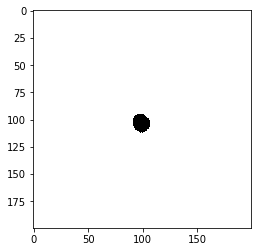

In [271]:
plt.imshow(crop_img_test(df, io.imread(masks[0]), 0), cmap='Greys')

In [375]:
def get_blurred_mask(df, BF_file, obj_number, mask): 
    BF_img = io.imread(BF_file).astype('float')/255
    mask = io.imread(mask)

    print('------------get centre crop--------------------')
    mask_blurred  = cv2.GaussianBlur(mask,(3,3),0)
    mask_large=np.where(mask_blurred>0, BF_img, 1)
    mask_large_blurred = cv2.GaussianBlur(mask_large, (11,11),0)
    img=mask_large_blurred.astype('float')/255
    img=((img*BF_img)*255).astype('uint16')
    return img


------------get centre crop--------------------


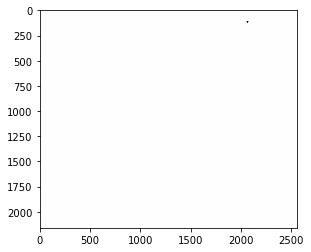

In [403]:
masked = (get_blurred_mask(df, BF_file, 1, masks[0])); 
cropped_img = crop_img_test(df, masked, 1); plt.imshow(masked, cmap='Greys')

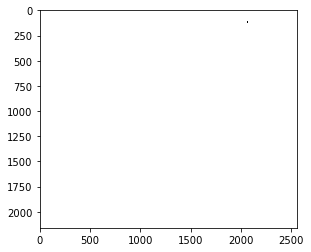

In [315]:
plt.imshow(io.imread(masks[0]), cmap='binary')

------------get centre crop--------------------


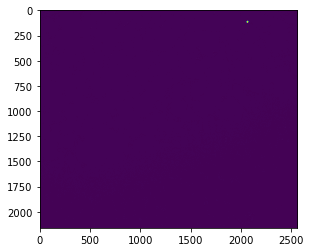

In [316]:
BF_img = io.imread(BF_file).astype('float')/255

print('------------get centre crop--------------------')
mask_blurred  = cv2.GaussianBlur(io.imread(masks[0]),(3,3),0)
mask_large=np.where(mask_blurred>0, BF_img, 1)
mask_large_blurred = cv2.GaussianBlur(mask_large, (11,11),0)
img=mask_large_blurred.astype('float')/255
img=((img*BF_img)*255).astype('uint16')
plt.imshow(img)

In [144]:
df = pd.read_csv('/hpc/scratch/hdd2/fs541623/CellProfilerFeatureExtraction/CP_Data/Time_16hrs_R1/Well_08/FilteredCytObj.csv')
BF_file = '/hpc/scratch/hdd2/fs541623/Pre_processed_Images/Time_16hrs_R1/Well_08/Brightfield/Time_16hrs_R1_Well_08_Field_1_C1.tif'
mask = io.imread('/hpc/scratch/hdd2/fs541623/CellProfilerFeatureExtraction/CP_Cropped_Cells/Time_16hrs_R1/Well_08/Field1/FilteredCytObj_1.tiff')
mask_name=sorted(glob.glob(f'/hpc/scratch/hdd2/fs541623/CellProfilerFeatureExtraction/CP_Cropped_Cells/Time_16hrs_R1/Well_08/Field1/FilteredCyt*'), key=os.path.getctime)
io.imread(mask_name[0])

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [329]:
if __name__ == '__main__':
    
    # Input/output dir
    input_obj_csv = sorted(glob.glob('/hpc/scratch/hdd2/fs541623/CellProfilerFeatureExtraction/CP_Cropped_Cells/*/*/FilteredCytObj.csv'), key=os.path.getctime)
    output_path = '/hpc/scratch/hdd2/fs541623/IndividuallyCroppedCells'
    BF_path = '/hpc/scratch/hdd2/fs541623/Pre_processed_Images'
        
    # Compile Regex; pass into main to extract img metadata to create filenames
    re_time = re.compile(r'(Time_\d+hrs_R\d)')
    re_well = re.compile(r'(Well_\d+)')
    
    # Save centre cropped cells for each img in each timepoint/well
    main(input_obj_csv, re_time, re_well, BF_path, output_path)

TypeError: main() missing 1 required positional argument: 'output'

In [14]:
# Input/output dir
input_obj_csv = sorted(glob.glob('/hpc/scratch/hdd2/fs541623/CellProfilerFeatureExtraction/CP_Data/*/*/FilteredCytObj.csv'), key=os.path.getctime)
output_path = '/hpc/scratch/hdd2/fs541623/IndividuallyCroppedCells'
BF_path = '/hpc/scratch/hdd2/fs541623/Pre_processed_Images'

# Compile Regex; pass into main to extract img metadata to create filenames
re_time = re.compile(r'(Time_\d+hrs_R\d)')
re_well = re.compile(r'(Well_\d+)')
re_field = re.compile(r'(Field_\d+)')

# Save centre cropped cells for each img in each timepoint/well
main(input_obj_csv, re_time, re_well, re_field, BF_path, output_path)

--current csv: /hpc/scratch/hdd2/fs541623/CellProfilerFeatureExtraction/CP_Data/Time_16hrs_R1/Well_08/FilteredCytObj.csv--
Time_16hrs_R1_Well_08_Field_1_C1.tif
629
0
----------innner for loop -----------------------


NameError: name 'get_centre_crop' is not defined